# Results of different #agent values

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner', 'damage', 'num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,0.040204,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,0.151127,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,0.569797,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,1.508848,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,2.875129,34267.022912,400.0


In [11]:
planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'TravelingLinePlanner', 'SeparateTravelingPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

IterativeAssignmentPlanner: 11
KmeansAssignmentPlanner: 11
StaticLinePlanner: 11
TravelingLinePlanner: 6
SeparateTravelingPlanner: 11


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,0.040204,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,0.151127,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,0.569797,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,1.508848,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,2.875129,34267.022912,400.0
5,IterativeAssignmentPlanner,500,10.0,2.0,5.0,265.152584,4.077722,48186.716291,500.0
6,IterativeAssignmentPlanner,600,10.0,2.0,5.0,304.659774,6.069700,63736.074416,600.0
7,IterativeAssignmentPlanner,700,10.0,2.0,5.0,343.493102,7.684384,84336.773723,700.0
8,IterativeAssignmentPlanner,800,10.0,2.0,5.0,374.411981,10.144517,105199.402315,800.0
9,IterativeAssignmentPlanner,900,10.0,2.0,5.0,404.798757,11.719195,127028.941350,900.0


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

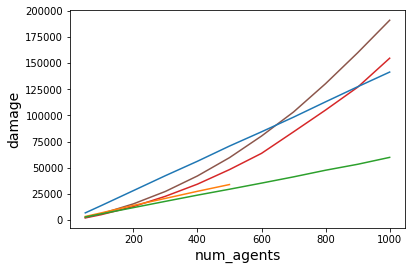

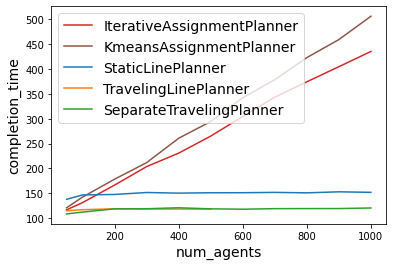

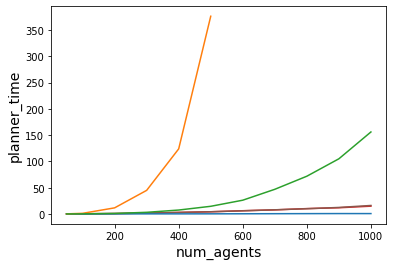

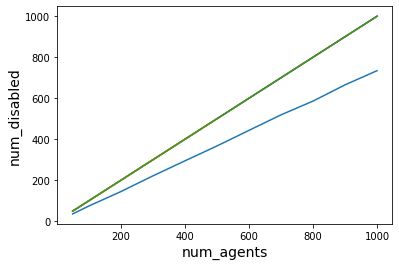

In [12]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 1:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png',bbox_inches='tight')
    plt.show()